<a href="https://colab.research.google.com/github/sahilgupta969/MNIST-Digit-classification-using-NN/blob/master/MNIST_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependecies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data from keras.dataset

In [2]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy array
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


In [5]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


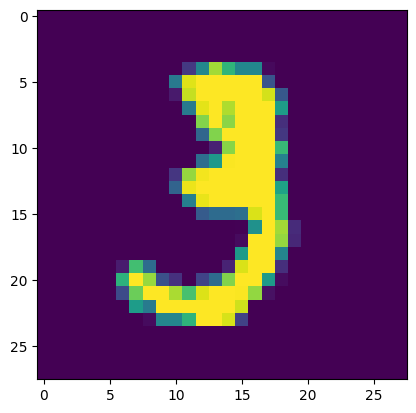

3


In [8]:
# displaying the image
plt.imshow(X_train[10])
plt.show()

# print the corresponding label
print(Y_train[10])

In [9]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the values between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [12]:
# setting up the layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8791 - loss: 0.4341
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9631 - loss: 0.1247
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.0812
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9825 - loss: 0.0585
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0434
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0254
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0200
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0160
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9965 - loss: 0.0138


traning data accuracy = 99.6%

**Accuracy on test data**

In [15]:
loss , accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.1049
0.9764000177383423


Test data accuracy = 97.1%

In [16]:
print(X_test.shape)

(10000, 28, 28)


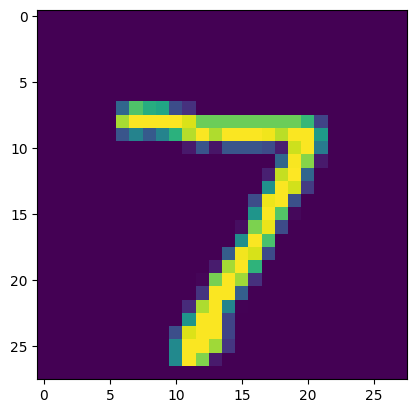

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
print(Y_pred[0])

[3.8218721e-05 2.0478456e-07 2.8578212e-04 8.4180695e-01 1.5138127e-10
 5.4675713e-04 1.4130924e-09 9.9995524e-01 1.1353686e-02 1.8270378e-01]


model.predict() gives the prediction probability of each class for that data point

In [24]:
# converting the prediction probabilities to class label for all test data points

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [26]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusion Matrix

In [27]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 957    0    0    3    1    4    2    0    1   12]
 [   1 1120    3    2    0    0    4    1    4    0]
 [   0    0 1012    2    1    0    2    6    9    0]
 [   0    0    6  981    0    4    1    7    4    7]
 [   4    0    2    0  958    2    5    2    1    8]
 [   2    0    0   11    3  867    3    0    2    4]
 [   1    2    1    0    2    7  943    1    1    0]
 [   0    2   12    3    4    0    0  985    0   22]
 [   2    1    3    7    3    5    1    3  946    3]
 [   0    2    0    1    8    1    0    1    1  995]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

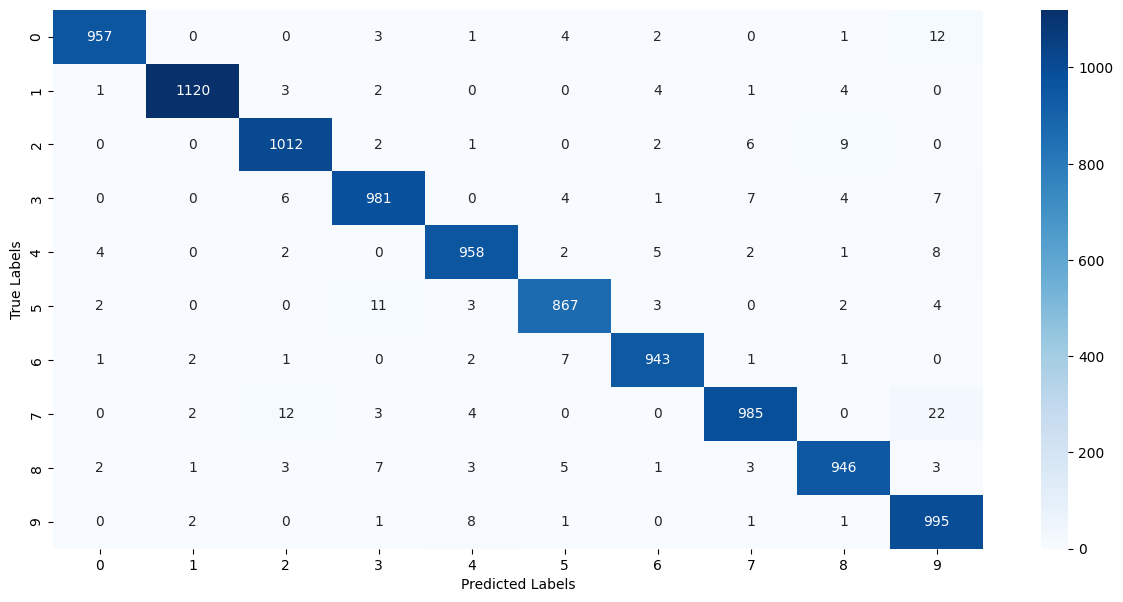

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a Predictive System**

In [29]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [30]:
type(input_image)

numpy.ndarray

In [31]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


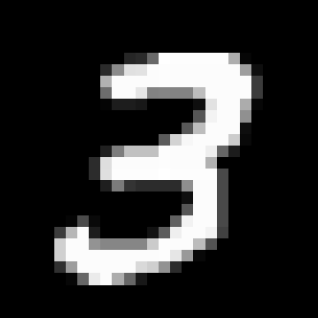

In [33]:
cv2_imshow(input_image)

In [34]:
input_image.shape

(318, 318, 3)

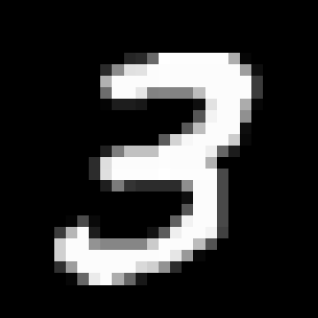

In [35]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [36]:
input_image_resize = cv2.resize(grayscale, (28,28))
cv2_imshow(input_image_resize)

In [37]:
input_image_resize = input_image_resize/255

In [38]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [39]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[6.9292089e-10 7.1312352e-09 2.9934442e-06 1.0000000e+00 2.8555975e-17
  4.9501555e-03 5.3542862e-17 1.4193864e-06 5.3528305e-02 4.4608846e-02]]


In [40]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


# Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


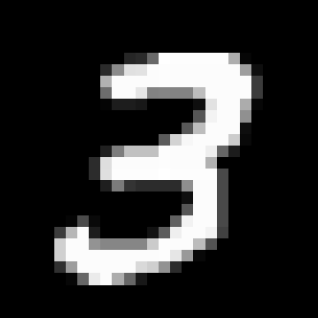

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Handwritten Digit is recognised as  3


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)